
# Introduction to Decision Trees 
## 

## Background

Let's do a high-level recap of what we've learned in this course so far:

Say we have input data $X = (X_1, X_2, ..., X_n)$ and corresponding class labels $Y = (Y_1, Y_2, ..., Y_n)$ where $n$ represents the number of observations/instances (i.e., unique samples). Much of statistical learning concerns trying to model this relationship between our data's $X$ and $Y$. In particular, we assert that the $Y$'s were produced/generated by some underlying function $f(X)$, and that there is inevitably some noise and systematic, implicit bias and error $\epsilon$ that cannot be captured by any $f(X)$. Thus, we have:

$Y = f(X) + \epsilon$

Its important to remember that most of the time (and certainly in this class) X is often times a vector in a multi-dimensional space, because we are collecting a lot of data. This has advantages, because more features usually means better prediction.  

If you are working with labels $Y$, and you make use of them for your modelling, then you are working on a **supervised** learning task. If you do not have or make use of $Y$ values, and you are only concerned with the input data $X$, you are working on an **unsupervised** learning task.  I hope to talk about this next week, as it may be helpful in your class projects.  

Modeling data concerns either **prediction** or **inference**:

**Prediction:** concerns trying to learn a function $\hat{f}(X)$ that is as close as possible to the true function $f(X)$. This allows us to estimate $Y$ values for any new input data $X$.
*   This is what you are doing this week with Logistic Regression models to predict heart disease (the labels). 

**Inference:** concerns trying to understand/model the _relationship_ between $X$ and $Y$, effectively learning how the data was generated.  
*   This is what we did when we fit different parameters of the shifted Wald distribution to response time data that came from different experimental conditions (the labels)

### What if our data looked like this? 

![](images/complex.png)

### We could develop complicated models (e.g., deep learning neural networks to solve the problem of separating the two classes of data)
### It would be desirable to build models of data that allow for complex decision boundaries while maintaining intepretability. 

## What is a decision tree?  

### At its heart, a decision tree is a flow chart. 

### Formally, a decision tree model is one in which the final outcome of the model is based on a series of comparisons of the values of predictors against threshold values.
### In a graphical representation (flow chart),
* ### the internal nodes of the tree represent attribute testing.
* ### branching in the next level is determined by attribute value.
* ### terminal leaf nodes represent class assignments.

![](images/orangelemon.png)



### Unlike Logistic Regression, which makes lines of arbitrary orientation, in a decision tree every flow chart tree corresponds to a partition of the feature space by axis aligned lines or (hyper) planes. Conversely, every such partition can be written as a flow chart tree. 

### Given a training set, learning a decision tree model for binary classification means:
* ###  producing an optimal partition of the feature space with axis-aligned linear boundaries (maximally interpretable!),
* ### each region is predicted to have a class label based on the largest count of the training points in that region. 


### My goal is for none of the topics we learn in this class to seem like nebulus concepts or black-boxes of magic. In this course, it's important to understand the models that you can use to help you with your data, and this includes not only knowing how to invoke these as tools within Python libraries but to have an understanding of what each model is actually doing 'under the hood' -- how it actually works -- as this provides insights into how to interpret the model.  



In [69]:
# imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

In [70]:
#Load the play_tennis data set 
tennis_df = pd.read_csv("data/play_tennis.csv")
tennis_df.info()
tennis_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [71]:
tennis_num = tennis_df
tennis_num = pd.get_dummies(tennis_num, columns=['outlook', 'temp', 'humidity', 'windy'])
tennis_num.info()
tennis_num.head()

class_names   = ['No','Yes']
feature_names = tennis_num.columns[1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   play              14 non-null     object
 1   outlook_overcast  14 non-null     uint8 
 2   outlook_rainy     14 non-null     uint8 
 3   outlook_sunny     14 non-null     uint8 
 4   temp_cool         14 non-null     uint8 
 5   temp_hot          14 non-null     uint8 
 6   temp_mild         14 non-null     uint8 
 7   humidity_high     14 non-null     uint8 
 8   humidity_normal   14 non-null     uint8 
 9   windy_False       14 non-null     uint8 
 10  windy_True        14 non-null     uint8 
dtypes: object(1), uint8(10)
memory usage: 384.0+ bytes


In [72]:
# separate our data into X and Y portions
x_train = tennis_num.iloc[:, tennis_num.columns != 'play'].values
y_train = tennis_num['play'].values

We can build a DecisionTree classifier as follows:

In [73]:
dt = DecisionTreeClassifier().fit(x_train, y_train)

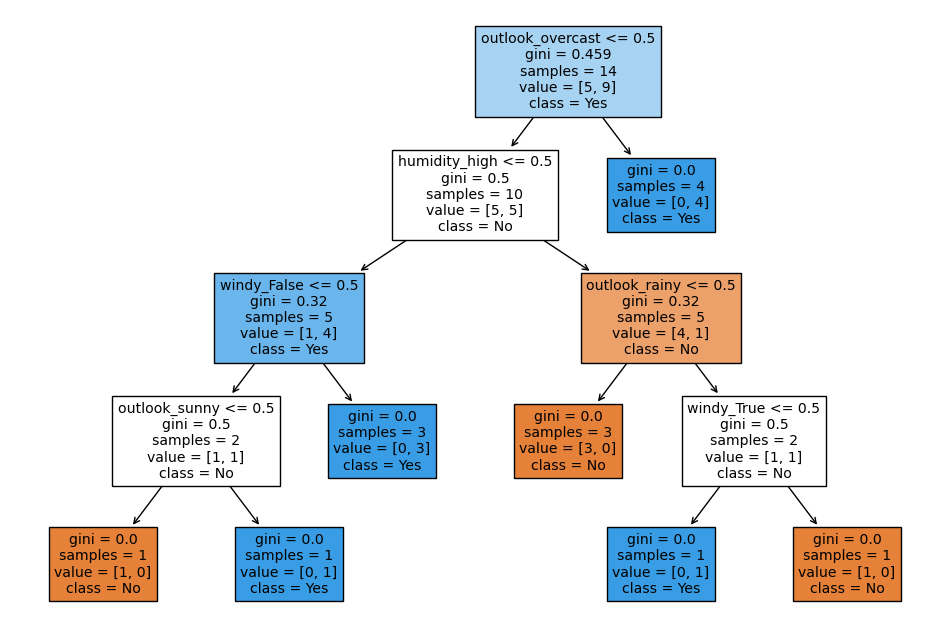

In [74]:
plt.figure(figsize=(12,8))
tree_vis = plot_tree(dt, filled=True, feature_names = feature_names, class_names = class_names)

### The goal here is to make splits that will create pure as possible regions of the feature space.  The Gini coefficient is a statistical measure of how "pure" a class is.  The goal of a decision tree is to partition the data into pure classes with gini = 0 

In the above example, we did not use the tree to do any classification. Our data was too small to consider such.

### Let's revisit the PIMA Indians diabetes data.

In [75]:
# load in the data
pima = pd.read_csv("data/diabetes.csv")
pima.info()
cols = pima.columns
diabetes = pima['Outcome']
predictors = pima[cols[1:8]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
# isolate out the data we need
X             = np.array(predictors)
y             = diabetes
class_names   = class_names=['Undiagnosed','Diabetes']
feature_names = cols[1:8]

# perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a decision tree classifier with max_depth=2
dt_pima = DecisionTreeClassifier(max_depth=4, random_state=42)
#dt_pima = DecisionTreeClassifier(min_samples_split =5, random_state=42)

dt_pima.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

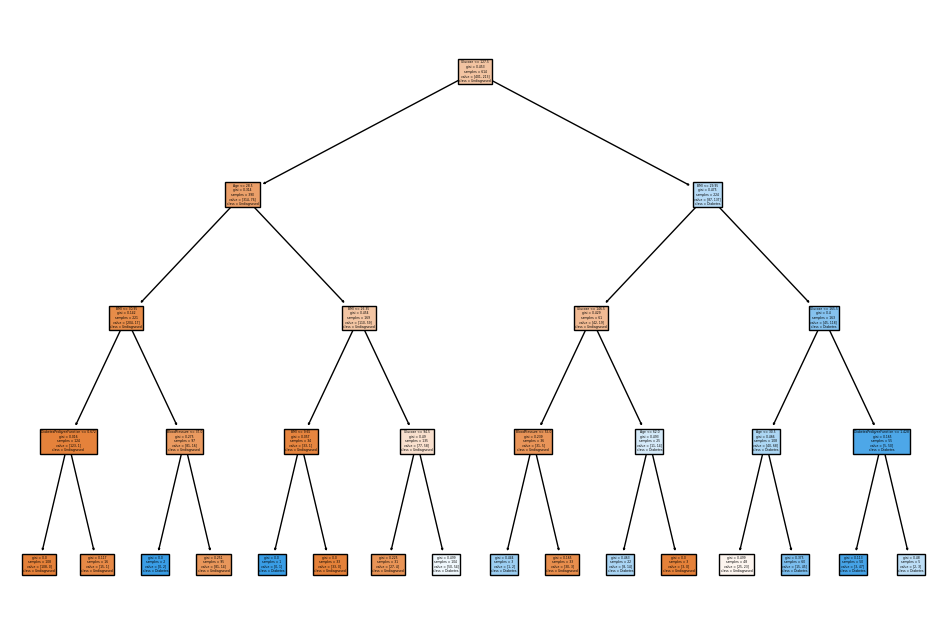

In [84]:
plt.figure(figsize = (12,8))
plot_tree(dt_pima, filled=True, feature_names = feature_names, class_names = class_names)
plt.show()

### Precision - What proportion of postive identifications were actually correct
###  
### TP = True Positive
### FP = False Positive
### TN - True Negative 
### FN - False Negative
### Accuracy - what fraction did you get right 
### $$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$  
### Precision - what fraction of the positives were labeled correctly?
### $$ Precision = \frac{TP}{TP+FP}$$
### Recall - What proportion of actual positive was identified correctly? 
### $$ Recall = \frac{TP}{TP+FN}$$

In [78]:
y_pred = dt_pima.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred))
print('recall score: %.2f' % recall_score(y_test,y_pred))

accuracy score: 0.76
precision score: 0.68
recall score: 0.62


In [85]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[83 16]
 [21 34]]


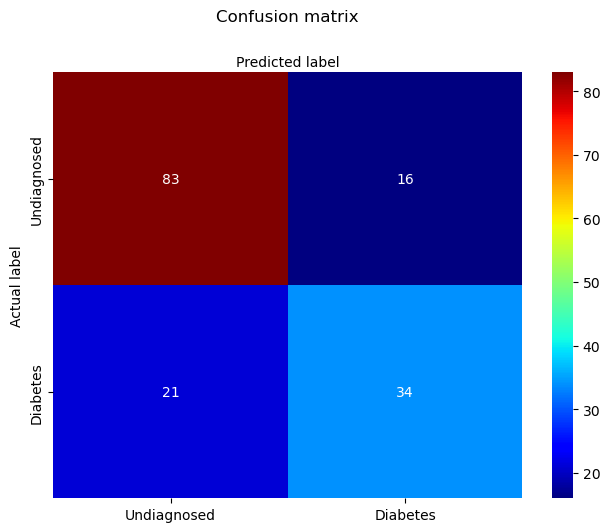

In [80]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

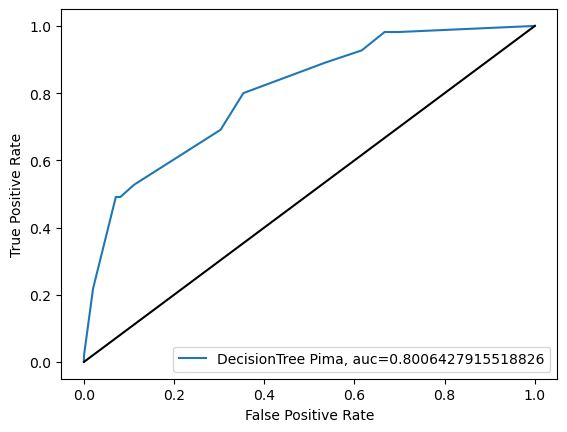

In [86]:
y_pprob = dt_pima.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pprob[:,1])
auc = roc_auc_score(y_test, y_pprob[:,1])
plt.plot(fpr,tpr,label="DecisionTree Pima, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k-')
plt.legend(loc=4)
plt.show()

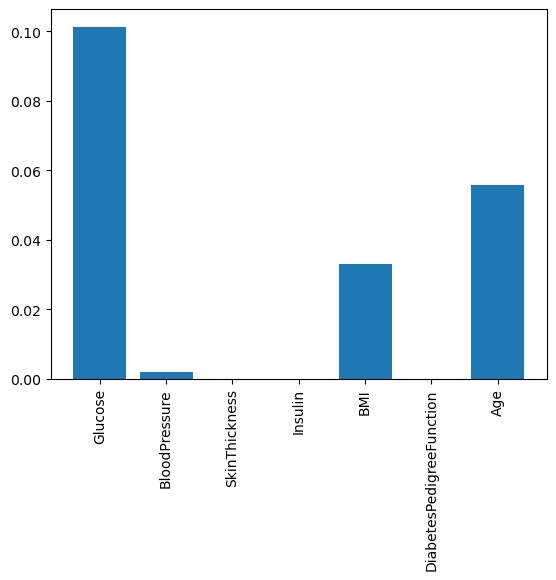

In [87]:
from sklearn.inspection import permutation_importance
result = permutation_importance(dt_pima,X_test,y_test,n_repeats = 10)
plt.bar(feature_names,result['importances_mean'])
plt.xticks(feature_names,rotation=90)
plt.show()

In [ ]:
## The right way to do this, might be to make a loop 
#for j in range(2,6)
#    dt = DecisionTreeClassifier(max_depth = j,rand_state = 43)


### Random Forest Classifier
### There are two main limitations of decision trees: 
* ### Decision trees are greedy optimization methods. 
* ### Manual inspection of a whole set of models with different numbers of features is time consuming. This might be ok when we work with a small number of features. 
### There are a number of approaches that have been developed to objectively select a decision tree.  I will focus on one which is widely used called a Random Forest. 
### The idea behind a random forest is to fit a large number of models, with some randomness

### Random Forests
### Random Forest creates ensembles of independent decision trees:
### 1. Train each tree on a separate random sample of the full training set
### 2. For each tree, at each split, we randomly select a subset of predictors from the full set of predictors.
### 3. From amongst the 𝐽′ predictors, we select the optimal predictor and the optimal corresponding threshold for the split.
### 4. The results of all the trees are then averaged together ("voting") to make the prediction.  

In [93]:
from sklearn.ensemble import RandomForestClassifier
n_trees = 10
rf_pima = RandomForestClassifier(n_estimators=n_trees, max_depth=5)
rf_pima.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [94]:
y_pred = rf_pima.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred))
print('recall score: %.2f' % recall_score(y_test,y_pred))

accuracy score: 0.77
precision score: 0.68
recall score: 0.65


In [95]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[82 17]
 [19 36]]


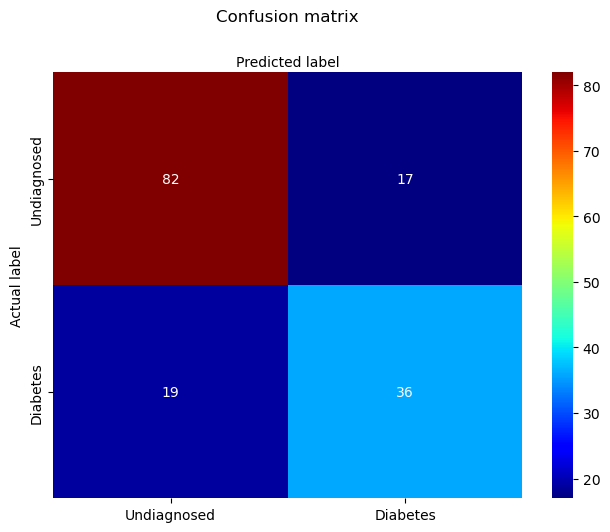

In [96]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

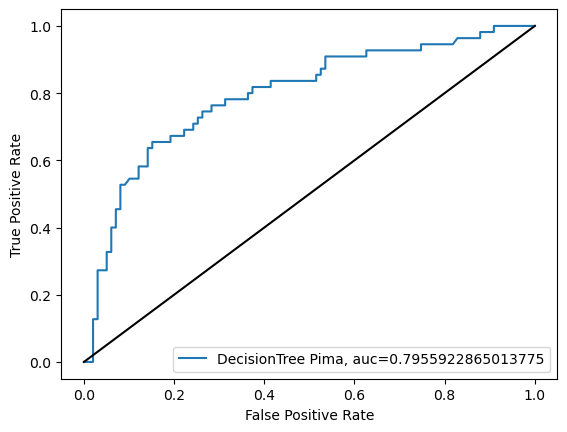

In [98]:
y_pprob = rf_pima.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pprob[:,1])
auc = roc_auc_score(y_test, y_pprob[:,1])
plt.plot(fpr,tpr,label="DecisionTree Pima, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k-')
plt.legend(loc=4)
plt.show()

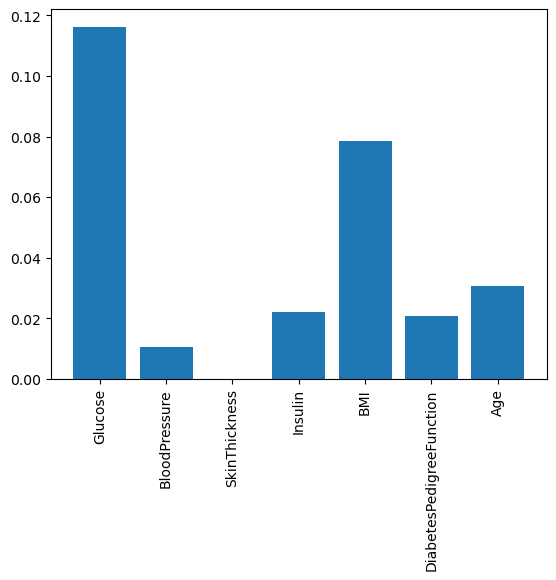

In [99]:
result = permutation_importance(rf_pima,X_test,y_test,n_repeats = 10)
plt.bar(feature_names,result['importances_mean'])
plt.xticks(feature_names,rotation=90)
plt.show()